In [1]:
import os

n = 1
dir_name = f"Map Experiment final #{n}"
experiment_path = f'./data/{dir_name}'

if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)
else:
    raise Exception(f"warning almost deleted old run #{n}")

In [2]:
from map_maker import cluttered_map, save_map
from Turtlebot_Kinematics import unicycleKin
from environment import Environment, load_ENV
from Runner import ControllMode, Runner
from pso_controller import Multi_PSO_Controller
from dwa_controller import DWA_Controller

kinematic = unicycleKin()
map_num = 31
run_per_map = 5
dt = 0.16
max_index = None

dwa_horizon = 3.5

# map parameters
map_obs = 8
map_size = 50
map_unknown = True
map_name = f"cluttered_{map_obs}obs_{map_size}x{map_size}_{'unknown' if map_unknown else 'known'}"

pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
map_path = f"{experiment_path}/maps"
if not os.path.exists(map_path):
    os.makedirs(map_path)

maps = []

for i in range(map_num):
    run_map = cluttered_map(map_obs, map_size, map_unknown)
    maps.append(run_map)
    save_map(run_map, f"{map_name} {i}", map_path)


for i in range(run_per_map):
    run_path = f"{experiment_path}/{i}"
    if not os.path.exists(run_path):
        os.makedirs(run_path)

    for j, map in enumerate(maps):
        map_path = f"{run_path}/map {i}"
        if not os.path.exists(map_path):
            os.makedirs(map_path)

        # run and save MultiPSO data
        Multi_PSO_ENV = Environment.from_dict(map, kinematic, record=True)
        Multi_PSO_controller = Multi_PSO_Controller(7, kinematic, 8, 0.93, 8)
        if max_index is None:
            max_index = Multi_PSO_ENV.goal_travel_time / dt + 200
        else: max_index = max(max_index, Multi_PSO_ENV.goal_travel_time / dt + 200)
        MultiPSO_Runner = Runner(
            Multi_PSO_ENV, 
            ControllMode.MultiPSO, 
            Multi_PSO_controller, 
            max_step = max_index,
            dt = dt,
            save_path= f"{map_path}/RHOPSOMP"
        )
        MultiPSO_Runner.loop()

        if i == 1:
            DWA_ENV = Environment.from_dict(map, kinematic, record=True)
            DWA_controller = DWA_Controller(20, kinematic, virtual_dt=dwa_horizon)
            if max_index is None:
                max_index = DWA_ENV.goal_travel_time / dt + 200
            else: max_index = max(max_index, DWA_ENV.goal_travel_time / dt + 200)
            DWA_Runner = Runner(
                DWA_ENV, 
                ControllMode.DWA, 
                DWA_controller, 
                max_step = max_index,
                dt = dt,
                save_path= f"{map_path}/DWA"
            )
            DWA_Runner.loop()



# 1
stepping (14.747757935637848, 0.6465626012210524)
offset [0. 0. 0.]
# 2
stepping (15.0, 0.9)
offset [0. 0. 0.]
# 3
stepping (14.316048617597504, 0.5903225806451613)
offset [0. 0. 0.]
# 4
stepping (13.594911080808012, 0.3447862768944694)
offset [0. 0. 0.]
# 5
stepping (12.639902318991664, 0.15731931687293993)
offset [0. 0. 0.]
# 6
stepping (10.985850176086254, 0.027173640702903457)
offset [0. 0. 0.]
# 7
stepping (10.674200381125845, -0.13260609898032372)
offset [0. 0. 0.]
# 8
stepping (10.874997617989248, -0.2302297123687178)
offset [0. 0. 0.]
# 9
stepping (10.433748050040489, -0.28877088668178913)
offset [0. 0. 0.]
# 10
stepping (10.490635999775348, -0.3890348892549666)
offset [0. 0. 0.]
# 11
stepping (13.253164499922425, -0.40516111809668487)
offset [0. 0. 0.]
# 12
stepping (11.273923409070559, -0.35201018378084675)
offset [0. 0. 0.]
# 13
stepping (11.247052060476378, -0.3337227600666126)
offset [0. 0. 0.]
# 14
stepping (10.737435309872962, -0.3097673848437728)
offset [0. 0. 0.]
#

In [ ]:
import json

info_dict = {
    "kinematic_model": str(type(kinematic)),
    "map_num": map_num,
    "run_per_map": run_per_map,
    "dt": dt,
    "max_index": max_index,
    "map_obs": map_obs,
    "map_size": map_size,
    "map_unknown": map_unknown
}

with open(f"{experiment_path}/info.json", "w") as file:
    json.dump(info_dict, file, indent=2)

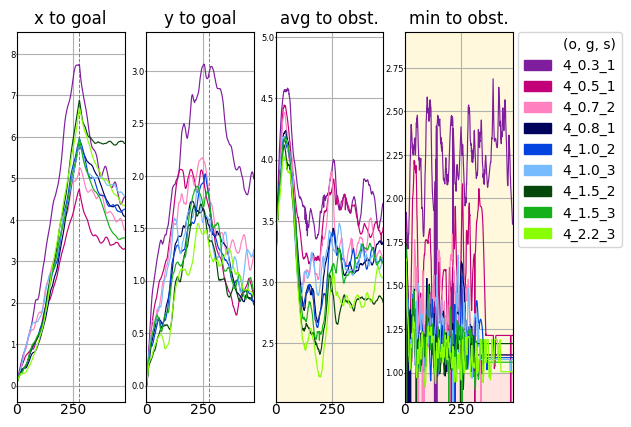

In [ ]:
import graphical_evaluation as ge
from graphical_evaluation import read_data, plot_data_dict
import matplotlib.pyplot as plt

depth = 1

ge.MAX_INDEX = int(max_index)
ge.DT = dt

data_dict = read_data(f"./data/{dir_name}", depth)
plot_data_dict(data_dict, depth, fig_name=dir_name, color_dict={})
plt.show()